# Northwind Product Analysis
***
***

Northwind is a fictional wholesaler of various food products.  The goal of this project is to use queries and visualizations to present insights about the organization's products.

In [1]:
%load_ext sql
%sql sqlite:///northwind.sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Data Overview

### Tables

In [2]:
%%sql
-- Tables in the database
SELECT name
FROM sqlite_master
WHERE type='table'
ORDER BY name

Done.


name
Categories
Customers
EmployeeTerritories
Employees
OrderDetails
Orders
Products
Region
Shippers
Suppliers


### Product Categories

In [3]:
%%sql
-- Ignore picture field
SELECT CategoryID, CategoryName, Description
FROM Categories;

Done.


CategoryID,CategoryName,Description
1,Beverages,"b'Soft drinks, coffees, teas, beers, and ales\x00'"
2,Condiments,"b'Sweet and savory sauces, relishes, spreads, and seasonings\x00'"
3,Confections,"b'Desserts, candies, and sweet breads\x00'"
4,Dairy Products,b'Cheeses\x00'
5,Grains/Cereals,"b'Breads, crackers, pasta, and cereal\x00'"
6,Meat/Poultry,b'Prepared meats\x00'
7,Produce,b'Dried fruit and bean curd\x00'
8,Seafood,b'Seaweed and fish\x00'


### Products

In [4]:
%%sql
SELECT *
FROM Products
LIMIT 5;

Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [18]:
%%sql
SELECT COUNT(DISTINCT ProductID) AS 'Number of Products'
FROM Products;

Done.


Number of Products
77


### Suppliers

In [6]:
%%sql
SELECT *
FROM Suppliers
LIMIT 5;

Done.


SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,b'#CAJUN.HTM#\x00'
3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None
4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,None,100,Japan,(03) 3555-5011,None,None
5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,None,None


In [17]:
%%sql
SELECT COUNT(DISTINCT SupplierID) AS 'Number of Suppliers'
FROM Suppliers;

Done.


Number of Suppliers
29


### Order Details

In [8]:
%%sql
SELECT *
FROM OrderDetails
LIMIT 5;

Done.


OrderID,ProductID,UnitPrice,Quantity,Discount
10248,11,14.0,12,0.0
10248,42,9.8,10,0.0
10248,72,34.8,5,0.0
10249,14,18.6,9,0.0
10249,51,42.4,40,0.0


In [9]:
%%sql
SELECT COUNT(*) AS 'Number of Records in Order Details'
FROM OrderDetails;

Done.


Number of Records in Order Details
2155


### Customers

In [10]:
%%sql
SELECT *
FROM Customers
LIMIT 5;

Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitucion 2222,Mexico D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taqueria,Antonio Moreno,Owner,Mataderos 2312,Mexico D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbkop,Christina Berglund,Order Administrator,Berguvsvagen 8,Lulea,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


### Regions

In [11]:
%%sql
SELECT *
FROM Region;

Done.


RegionID,RegionDescription
1,Eastern
2,Western
3,Northern
4,Southern


### Territories

In [123]:
%%sql
SELECT *
FROM Territories
LIMIT 10;

Done.


TerritoryID,TerritoryDescription,RegionID
01581,Westboro,1
01730,Bedford,1
01833,Georgetow,1
02116,Boston,1
02139,Cambridge,1
02184,Braintree,1
02903,Providence,1
03049,Hollis,3
03801,Portsmouth,3
06897,Wilton,1


## Data Investigation

### Number of products per category

In [74]:
%%sql
SELECT c.CategoryName AS Category, COUNT(*) AS Count
FROM Products p
JOIN Categories c ON p.CategoryID = c.CategoryID
GROUP BY c.CategoryName
ORDER BY Count DESC;

Done.


Category,Count
Confections,13
Beverages,12
Condiments,12
Seafood,12
Dairy Products,10
Grains/Cereals,7
Meat/Poultry,6
Produce,5


Done.


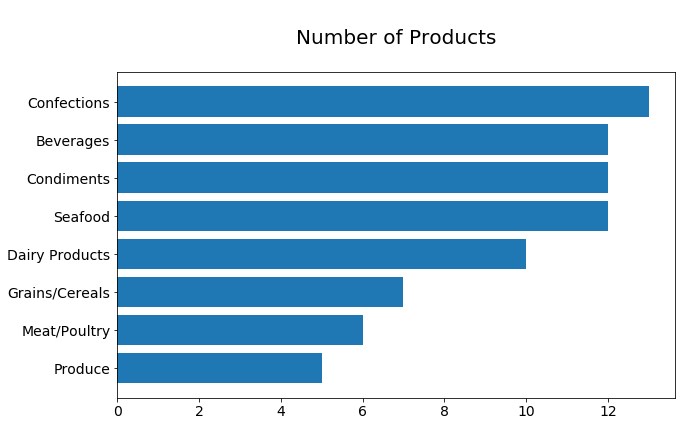

In [111]:
result = %sql SELECT c.CategoryName AS Category, COUNT(*) AS Count FROM Products p JOIN Categories c ON p.CategoryID = c.CategoryID GROUP BY c.CategoryName ORDER BY Count DESC;
res = result.DataFrame()

fig, ax  = plt.subplots(1, 1, figsize = (10,6));

plt.title('\nNumber of Products\n', fontsize=20);
plt.barh(range(len(res['Category'])), res['Count'][::-1]);
plt.xticks(fontsize=14);
plt.yticks(range(len(res['Category'])), res['Category'][::-1], fontsize=14);

### Average number of products per order

In [27]:
%%sql
SELECT ROUND(AVG(Count), 3) AS 'Average number of products per order'
FROM (SELECT COUNT(*) AS Count
FROM OrderDetails
GROUP BY OrderID) AS counts

Done.


Average number of products per order
2.596


### Number of products by supplier

In [112]:
%%sql
SELECT s.CompanyName, COUNT(*) AS Count
FROM Products p
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.CompanyName
ORDER BY Count DESC;

Done.


CompanyName,Count
"Pavlova, Ltd.",5
Plutzer Lebensmittelgrobmarkte AG,5
New Orleans Cajun Delights,4
"Specialty Biscuits, Ltd.",4
Bigfoot Breweries,3
Exotic Liquids,3
Formaggi Fortini s.r.l.,3
"G'day, Mate",3
Grandma Kelly's Homestead,3
Heli Subwaren GmbH & Co. KG,3


### Average number of products per supplier

In [113]:
%%sql
SELECT ROUND(AVG(Count), 2) AS 'Average Products Per Supplier'
FROM (SELECT COUNT(*) AS Count
FROM Products p
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.CompanyName) product_counts;

Done.


Average Products Per Supplier
2.66


### Number of suppliers by country

In [115]:
%%sql
SELECT s.Country, COUNT(DISTINCT SupplierID) AS Count
FROM Suppliers s
GROUP BY s.Country
ORDER BY Count DESC;

Done.


Country,Count
USA,4
France,3
Germany,3
Australia,2
Canada,2
Italy,2
Japan,2
Sweden,2
UK,2
Brazil,1


### Number of customers by country

In [116]:
%%sql
SELECT c.Country, COUNT(DISTINCT c.CustomerID) AS Count
FROM Customers c
GROUP BY c.Country
ORDER BY Count DESC;

Done.


Country,Count
USA,13
France,11
Germany,11
Brazil,9
UK,7
Mexico,5
Spain,5
Venezuela,4
Argentina,3
Canada,3


### Number of countries that are customers and suppliers

In [124]:
%%sql
SELECT COUNT(*) AS 'Customers and suppliers'
FROM (SELECT s.Country
FROM Suppliers s
INTERSECT
SELECT c.Country
FROM Customers c) countries;

Done.


Customers and suppliers
12


### Percent of discontinued products

In [125]:
%%sql
SELECT ROUND((100.0 * SUM(Discontinued)) / COUNT(*), 2) AS 'Percent of Products that are Discontinued'
FROM Products;

Done.


Percent of Products that are Discontinued
10.39


### Top 10 most ordered products by number of orders

In [134]:
%%sql
--Top 10 most ordered products by number of orders

SELECT p.ProductName, COUNT(*) AS Count
FROM Products p
JOIN OrderDetails od ON p.ProductID = od.ProductID
JOIN Orders o ON od.OrderID = o.OrderID
GROUP BY p.ProductName
ORDER BY Count DESC
LIMIT 10;

Done.


ProductName,Count
Raclette Courdavault,54
Camembert Pierrot,51
Gorgonzola Telino,51
Guarana Fantastica,51
Gnocchi di nonna Alice,50
Tarte au sucre,48
Jack's New England Clam Chowder,47
Rhonbrau Klosterbier,46
Chang,44
Pavlova,43


### Top 10 most ordered products by total quantity

In [156]:
%%sql
SELECT p.ProductName, SUM(od.Quantity) AS Total_Quantity
FROM Products p
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY p.ProductName
ORDER BY Total_Quantity DESC
LIMIT 10;

Done.


ProductName,Total_Quantity
Camembert Pierrot,1577
Raclette Courdavault,1496
Gorgonzola Telino,1397
Gnocchi di nonna Alice,1263
Pavlova,1158
Rhonbrau Klosterbier,1155
Guarana Fantastica,1125
Boston Crab Meat,1103
Tarte au sucre,1083
Chang,1057


### Each supplier's most popular product

In [173]:
%%sql
SELECT SupplierID, ProductName, MAX(Total_Quantity) AS Total_Quantity
FROM (SELECT p.SupplierID, p.ProductName, SUM(od.Quantity) AS Total_Quantity
FROM Products p
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY p.ProductName
ORDER BY SupplierID ASC) quantities
GROUP BY SupplierID

Done.


SupplierID,ProductName,Total_Quantity
1,Chang,1057
2,Louisiana Fiery Hot Pepper Sauce,745
3,Uncle Bob's Organic Dried Pears,763
4,Ikura,742
5,Queso Cabrales,706
6,Konbu,891
7,Pavlova,1158
8,Sir Rodney's Scones,1016
9,Tunnbrod,580
10,Guarana Fantastica,1125


### Each country's most popular product

In [174]:
%%sql
SELECT SupplierID, ProductName, MAX(Total_Quantity) AS Total_Quantity
FROM (SELECT p.SupplierID, p.ProductName, SUM(od.Quantity) AS Total_Quantity
FROM Products p
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY p.ProductName
ORDER BY SupplierID ASC) quantities
GROUP BY SupplierID

Done.


SupplierID,ProductName,Total_Quantity
1,Chang,1057
2,Louisiana Fiery Hot Pepper Sauce,745
3,Uncle Bob's Organic Dried Pears,763
4,Ikura,742
5,Queso Cabrales,706
6,Konbu,891
7,Pavlova,1158
8,Sir Rodney's Scones,1016
9,Tunnbrod,580
10,Guarana Fantastica,1125


In [162]:
%%sql
SELECT p.SupplierID, p.ProductName, SUM(od.Quantity) AS Total_Quantity
FROM Products p
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY p.SupplierID
ORDER BY p.ProductName ASC;

Done.


SupplierID,ProductName,Total_Quantity
1,Aniseed Syrup,2213
28,Camembert Pierrot,3073
18,Chartreuse verte,1416
27,Escargots de Bourgogne,534
24,Filo Mix,2108
15,Geitost,2526
10,Guarana Fantastica,1125
4,Ikura,1134
20,Ipoh Coffee,1878
19,Jack's New England Clam Chowder,2084


In [129]:
%%sql
--Number of customers by city

SELECT c.City, COUNT(DISTINCT c.CustomerID) AS Count
FROM Customers c
GROUP BY c.City
ORDER BY Count DESC;

Done.


City,Count
London,6
Mexico D.F.,4
Sao Paulo,4
Buenos Aires,3
Madrid,3
Rio de Janeiro,3
Lisboa,2
Nantes,2
Paris,2
Portland,2


In [127]:
%%sql
--Number of cities by customer country

SELECT c.Country, COUNT(DISTINCT c.City) AS Count
FROM Customers c
GROUP BY c.Country
ORDER BY Count DESC;

Done.


Country,Count
USA,12
Germany,11
France,9
Brazil,4
Venezuela,4
Canada,3
Italy,3
Spain,3
Austria,2
Belgium,2


In [152]:
%%sql
SELECT s.SupplierID, p.ProductName, SUM(od.Quantity) AS 'Total Quantity'
FROM OrderDetails od 
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.SupplierID
ORDER BY s.SupplierID ASC;

Done.


SupplierID,ProductName,Total Quantity
1,Aniseed Syrup,2213
2,Louisiana Hot Spiced Okra,1735
3,Northwoods Cranberry Sauce,1436
4,Ikura,1134
5,Queso Manchego La Pastora,1050
6,Tofu,1417
7,Pavlova,3937
8,Sir Rodney's Marmalade,2851
9,Tunnbrod,928
10,Guarana Fantastica,1125


In [ ]:
%%sql
-- Each supplier's most popular product

SELECT DISTINCT s.SupplierID, p.ProductName, SUM(od.Quantity)
FROM OrderDetails od 
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.SupplierID, p.ProductName
ORDER BY s.SupplierID ASC;

In [133]:
%%sql
-- Each supplier's must popular product
SELECT Country, ProductName, MAX(Total_Quantity)
FROM (SELECT DISTINCT s.Country, p.ProductName, SUM(od.Quantity) AS Total_Quantity
FROM OrderDetails od 
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.Country, p.ProductName
ORDER BY s.Country ASC) products
GROUP BY Country, ProductName;

Done.


Country,ProductName,MAX(Total_Quantity)
Australia,Alice Mutton,978
Australia,Carnarvon Tigers,539
Australia,Filo Mix,500
Australia,Manjimup Dried Apples,886
Australia,Outback Lager,817
Australia,Pavlova,1158
Australia,Perth Pasties,722
Australia,Vegie-spread,445
Brazil,Guarana Fantastica,1125
Canada,Pate chinois,903


In [ ]:
%%sql
SELECT *
FROM OrderDetails
LIMIT 10;